In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np

In [2]:
SessionA = pd.read_csv('SessionA.csv', delimiter = ';')
SessionB = pd.read_csv('SessionB.csv', delimiter = ';')
SessionC = pd.read_csv('SessionC.csv', delimiter = ';')
SessionD = pd.read_csv('SessionD.csv', delimiter = ';')
SessionE = pd.read_csv('SessionE.csv', delimiter = ';')
SessionF = pd.read_csv('SessionF.csv', delimiter = ';')
SessionG = pd.read_csv('SessionG.csv', delimiter = ';')
SessionH = pd.read_csv('SessionH.csv', delimiter = ';')
SessionI = pd.read_csv('SessionI.csv', delimiter = ';')
SessionJ = pd.read_csv('SessionJ.csv', delimiter = ';')
SessionK = pd.read_csv('SessionK.csv', delimiter = ';')
SessionL = pd.read_csv('SessionL.csv', delimiter = ';')
SessionM = pd.read_csv('SessionM.csv', delimiter = ';')
SessionN = pd.read_csv('SessionN.csv', delimiter = ';')
SessionO = pd.read_csv('SessionO.csv', delimiter = ';')
SessionP = pd.read_csv('SessionP.csv', delimiter = ';')
SessionQ = pd.read_csv('SessionQ.csv', delimiter = ';')
SessionR = pd.read_csv('SessionR.csv', delimiter = ';')
SessionS = pd.read_csv('SessionS.csv', delimiter = ';')
SessionT = pd.read_csv('SessionT.csv', delimiter = ';')


In [3]:
dep = [str(i) for i in range(31)]

def findP(x):
    for p in reversed(dep):
        if p in x:
            return "Participant" + p

In [4]:
#Data Clean - Organised for Plotting
def dfClean(df):
    df = df[df.columns.drop(list(df.filter(regex=r'\AArousal+.[0-9]')))]
    df = df[df.columns.drop(list(df.filter(regex=r'\AValence+.[0-9]')))]
    df = df[df.columns.drop(list(df.filter(regex=r'\AArousal')))]
    df = df[df.columns.drop(list(df.filter(regex=r'\AValence')))]
    df = df.drop('Sec↓/Measure →', axis=1)
    df = df.stack()
    df = df.to_frame()
    df.reset_index(level = 1, inplace = True)
    df['Participants'] = df['level_1'].apply(findP)

    df = df.replace(regex=r'\AArousal+.[0-9]', value = 'Arousal')
    df = df.replace(regex=r'\AValence+.[0-9]', value = 'Valence')
    df = df.replace(regex=r'\ASym/Hap', value = 'Sympathy/Happiness')
    df = df.replace(regex=r'\AFoc/Ang', value = 'Focus/Anger')
    df = df.replace(regex=r'\ASympathy/Happiness+.[0-9]', value = 'Sympathy/Happiness')
    df = df.replace(regex=r'\AFocus/Anger+.[0-9]', value = 'Focus/Anger')
    df = df.replace(regex=r'\ASurprise+.[0-9]', value = 'Surprise')
    df = df.replace(regex=r'\ADis/Sad', value = 'Indifference/Sadness')
    df = df.replace(regex=r'\AIndifference/Sadness+.[0-9]', value = 'Indifference/Sadness')
    df = df.replace(regex=r'\AArousal+[0-9]', value = 'Arousal')
    df = df.replace(regex=r'\AValence+[0-9]', value = 'Valence')
    df = df.replace(regex=r'\ASympathy/Happiness+[0-9]', value = 'Sympathy/Happiness')
    df = df.replace(regex=r'\AFocus/Anger+[0-9]', value = 'Focus/Anger')
    df = df.replace(regex=r'\ASurprise+[0-9]', value = 'Surprise')
    df = df.replace(regex=r'\AIndifference/Sadness+[0-9]', value = 'Indifference/Sadness')

    df.loc[df['Participants'].isnull(), 'Participants'] = 'Participant30'
    df = df.rename_axis('Second')
    df.columns = ["Moods", "Values", "Participants"]
    
    return df

In [5]:
SessionA = dfClean(SessionA)
SessionB = dfClean(SessionB)
SessionC = dfClean(SessionC)
SessionD = dfClean(SessionD)
SessionE = dfClean(SessionE)
SessionF = dfClean(SessionF)
SessionG = dfClean(SessionG)
SessionH = dfClean(SessionH)
SessionI = dfClean(SessionI)
SessionJ = dfClean(SessionJ)
SessionK = dfClean(SessionK)
SessionL = dfClean(SessionL)
SessionM = dfClean(SessionM)
SessionN = dfClean(SessionN)
SessionO = dfClean(SessionO)
SessionP = dfClean(SessionP)
SessionQ = dfClean(SessionQ)
SessionR = dfClean(SessionR)
SessionS = dfClean(SessionS)
SessionT = dfClean(SessionT)

In [6]:
SessionA

,Moods,Values,Participants
Second,,,
1,Sympathy/Happiness,0.043,Participant30
1,Focus/Anger,0.058,Participant30
1,Surprise,0.109,Participant30
1,Indifference/Sadness,0.070,Participant30
1,Sympathy/Happiness,0.036,Participant1
...,...,...,...
63,Indifference/Sadness,0.268,Participant20
64,Sympathy/Happiness,0.045,Participant6
64,Focus/Anger,0.024,Participant6


In [97]:
#Function Data Viz (All)

def showAll(df):
    sns.set_theme(style = "ticks")
    
    f, ax = plt.subplots(2, figsize=(12, 8))
    ax[0].set_xscale("linear")
    
    sns.boxplot(x="Values", y = "Moods", data = df,
               whis = [0,100], width=.7, palette = "vlag",
                ax = ax[0])
    
    sns.stripplot(x = "Values", y = "Moods", data = df,
                 size = 4, color = ".3", linewidth=0, ax = ax[0])
    
    ax[0].xaxis.grid(True)
    ax[0].set(ylabel="")
    
    line = sns.lineplot(x = 'Second', y = 'Values',
                hue = 'Moods', data = df, ax = ax[1])
    
    line.legend(loc = 'upper right', bbox_to_anchor=(1.25, 0.35))
    ax[1].yaxis.grid(True)
    

In [8]:
#Function Data Viz (ScatterPlot)
def checkOrder(df1, df2):
    sns.set_theme(style = "ticks")
    
    f, ax = plt.subplots(2, figsize=(12, 8))
    ax[0].set_xscale("linear")
    ax[1].set_xscale("linear")
    
    sns.boxplot(x="Values", y = "Moods", data = df1,
               whis = [0,100], width=.7, palette = "vlag",
                ax = ax[0])
    
    sns.stripplot(x = "Values", y = "Moods", data = df1,
                 size = 4, color = ".3", linewidth=0, ax = ax[0])
    
    ax[0].xaxis.grid(True)
    ax[0].set(ylabel="")
    
    sns.boxplot(x="Values", y = "Moods", data = df2,
               whis = [0,100], width=.7, palette = "vlag",
                ax = ax[1])
    
    sns.stripplot(x = "Values", y = "Moods", data = df2,
                 size = 4, color = ".3", linewidth=0, ax = ax[1])
      
    ax[1].xaxis.grid(True)
    ax[1].set(ylabel="")

In [9]:
#Function Data Viz (BoxPlot)
def showBox(df):
    sns.set_theme(style = "ticks")
    
    f, ax = plt.subplots(figsize=(12, 8))
    ax.set_xscale("linear")
    
    sns.boxplot(x="Values", y = "Moods", data = df,
               whis = [0,100], width=.7, palette = "vlag")
    
    sns.stripplot(x = "Values", y = "Moods", data = df,
                 size = 4, color = ".3", linewidth=0)
    
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim = True, left = True)

In [10]:
#Function Data Viz (Line Plot)
def showLine(df):
    sns.set_theme(style = "ticks")
    f, ax = plt.subplots(figsize=(12, 8))
    
    sns.lineplot(x = 'Second', y = 'Values',
                hue = 'Moods', data = df)
    
    ax.yaxis.grid(True)

In [11]:
P14A = SessionA.query('Participants == "Participant15"')
P15A = SessionA.query('Participants == "Participant16"')
P30B = SessionB.query('Participants == "Participant30"')
P11B = SessionB.query('Participants == "Participant11"')
P20C = SessionC.query('Participants == "Participant20"')
P18C = SessionC.query('Participants == "Participant18"')
P23D = SessionD.query('Participants == "Participant23"')
P25D = SessionD.query('Participants == "Participant25"')
P12E = SessionE.query('Participants == "Participant12"')
P19E = SessionE.query('Participants == "Participant19"')
P01H = SessionH.query('Participants == "Participant1"')
P30H = SessionH.query('Participants == "Participant30"')
P10I = SessionI.query('Participants == "Participant10"')
P07I = SessionI.query('Participants == "Participant7"')
P04J = SessionJ.query('Participants == "Participant4"')
P22J = SessionJ.query('Participants == "Participant22"')
P03M = SessionM.query('Participants == "Participant3"')
P29M = SessionM.query('Participants == "Participant29"')
P16O = SessionO.query('Participants == "Participant16"')
P29O = SessionO.query('Participants == "Participant29"')
P13P = SessionP.query('Participants == "Participant13"')
P02P = SessionP.query('Participants == "Participant2"')
P29Q = SessionQ.query('Participants == "Participant29"')
P08Q = SessionQ.query('Participants == "Participant8"')
P02R = SessionR.query('Participants == "Participant2"')
P13R = SessionR.query('Participants == "Participant13"')
P07T = SessionT.query('Participants == "Participant7"')
P01T = SessionT.query('Participants == "Participant1"')




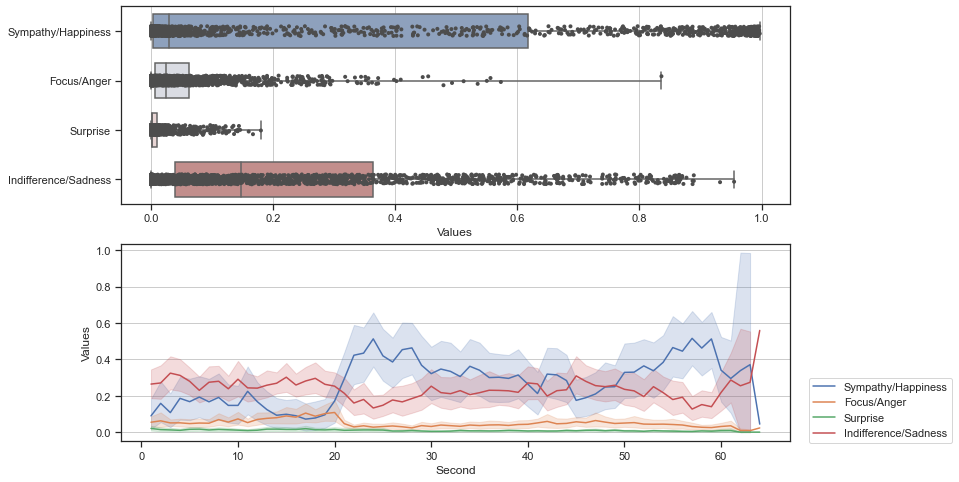

In [98]:
showAll(SessionA)

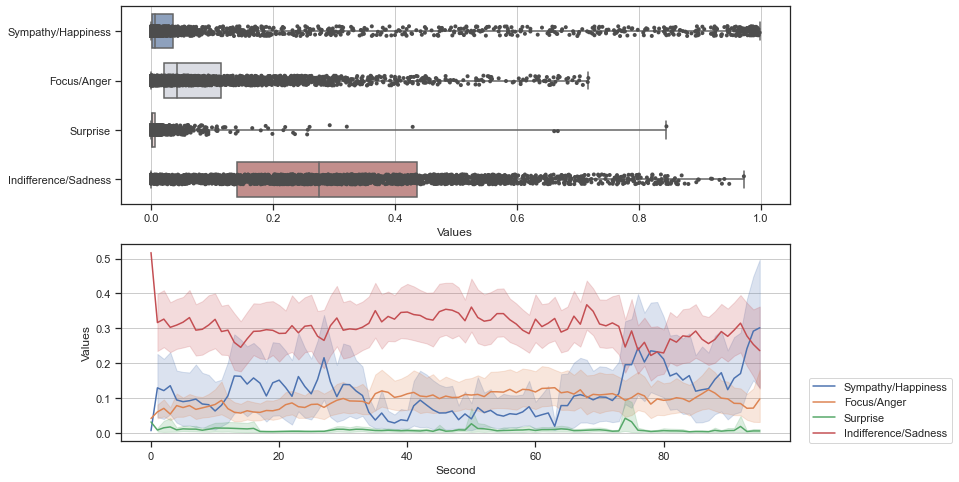

In [99]:
showAll(SessionB)

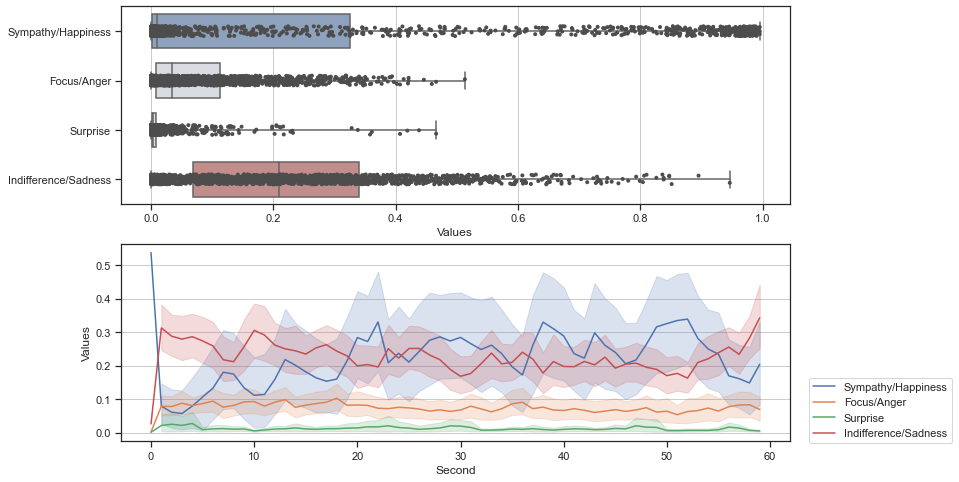

In [100]:
showAll(SessionC)

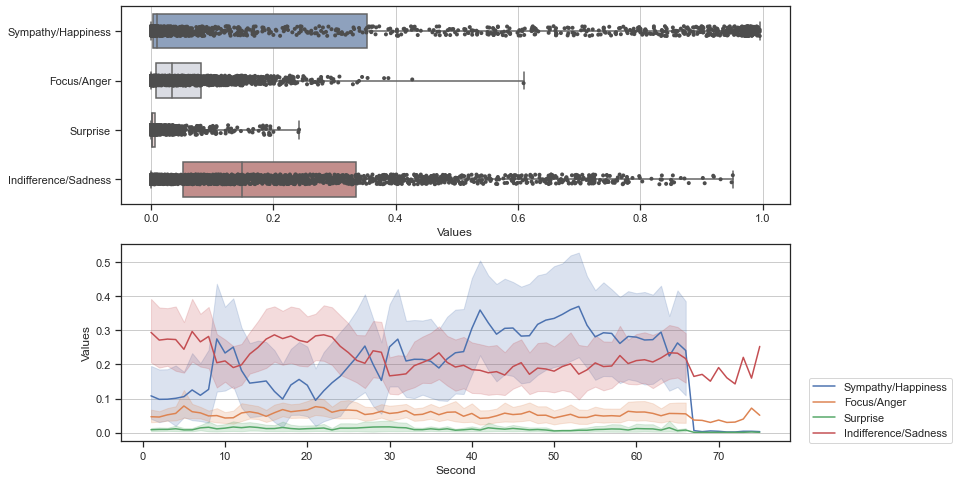

In [101]:
showAll(SessionD)

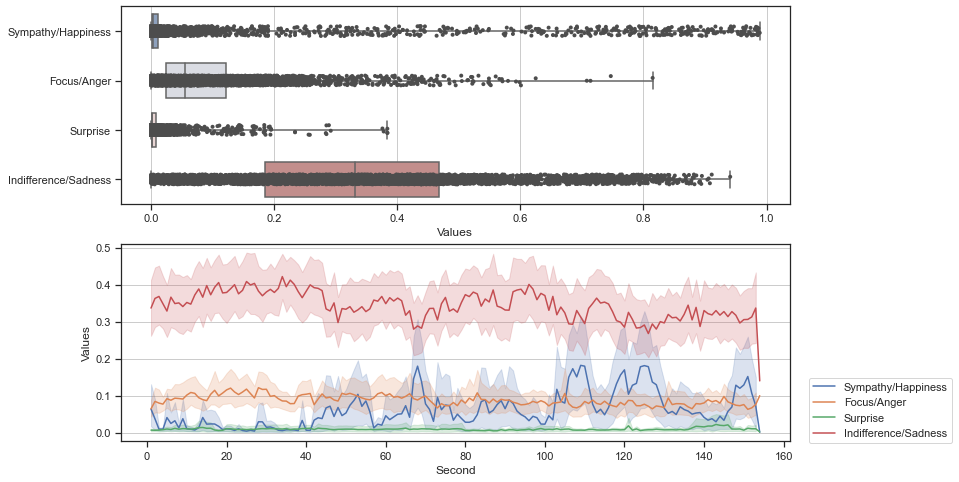

In [102]:
showAll(SessionE)

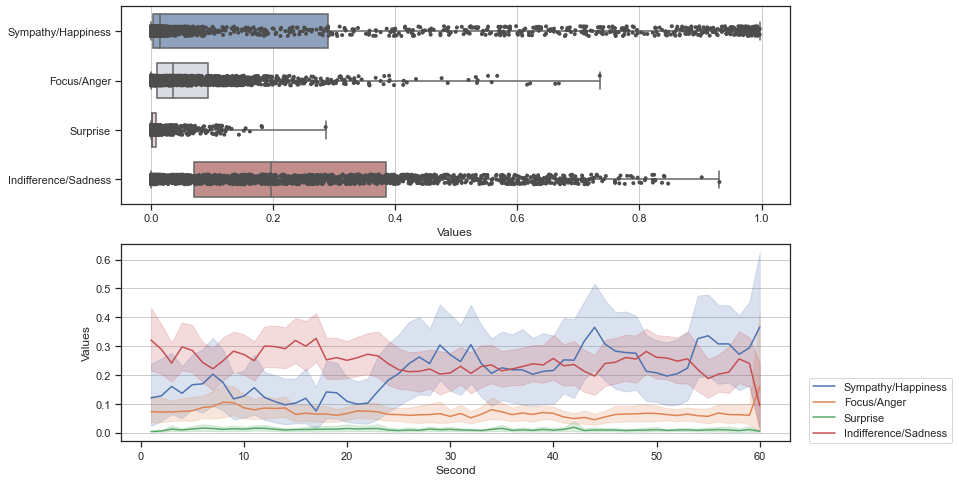

In [103]:
showAll(SessionF)

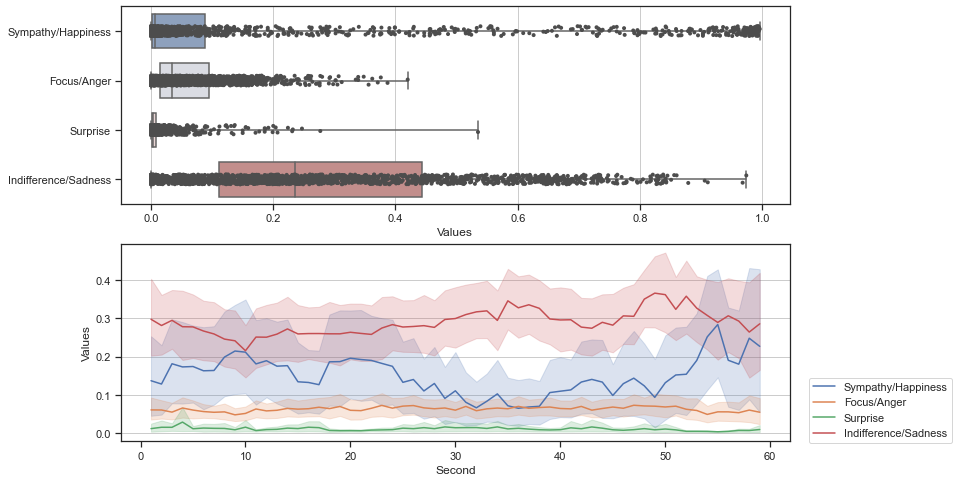

In [104]:
showAll(SessionG)

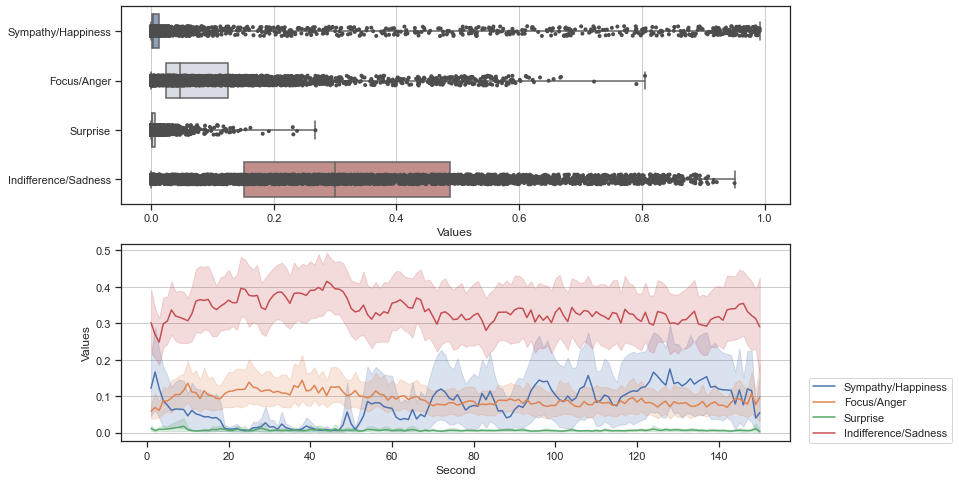

In [105]:
showAll(SessionH)

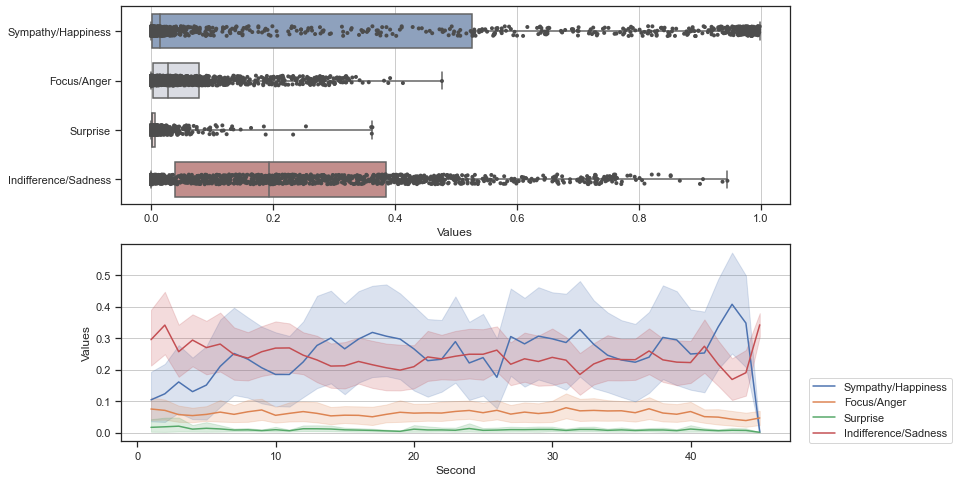

In [106]:
showAll(SessionI)

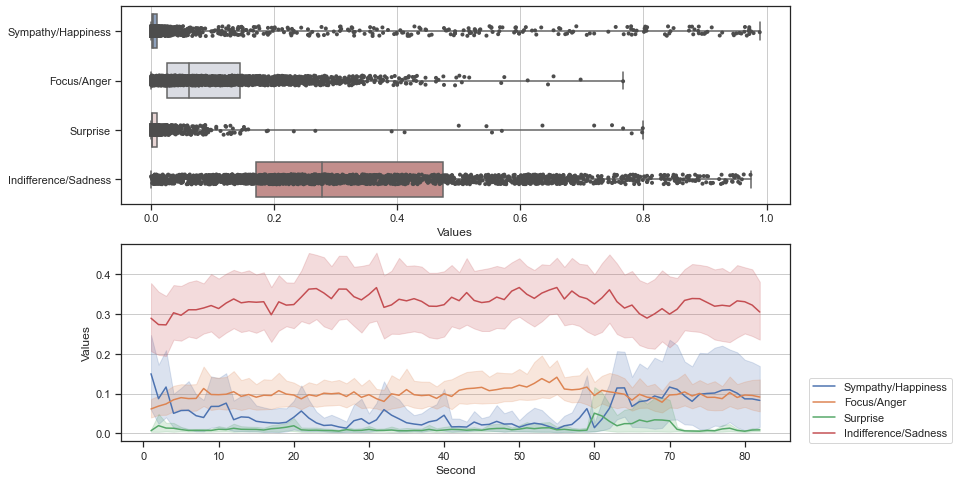

In [107]:
showAll(SessionJ)

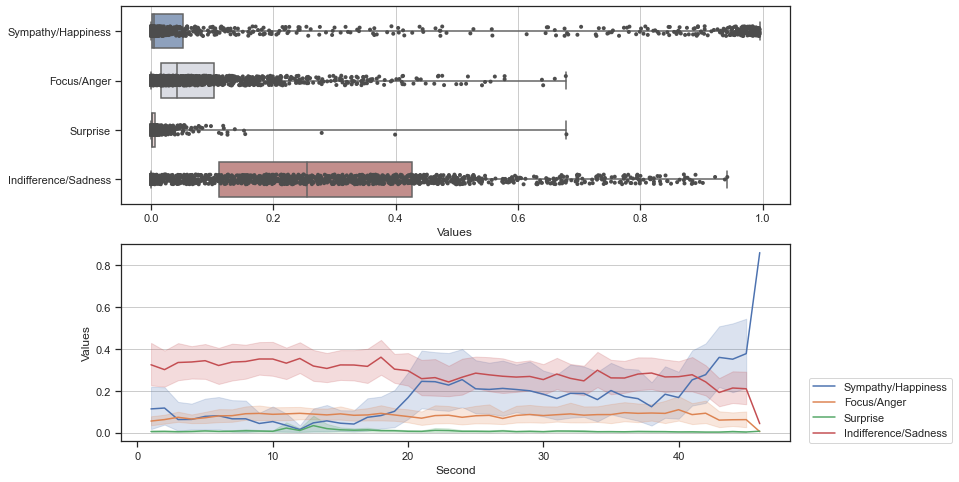

In [108]:
showAll(SessionK)

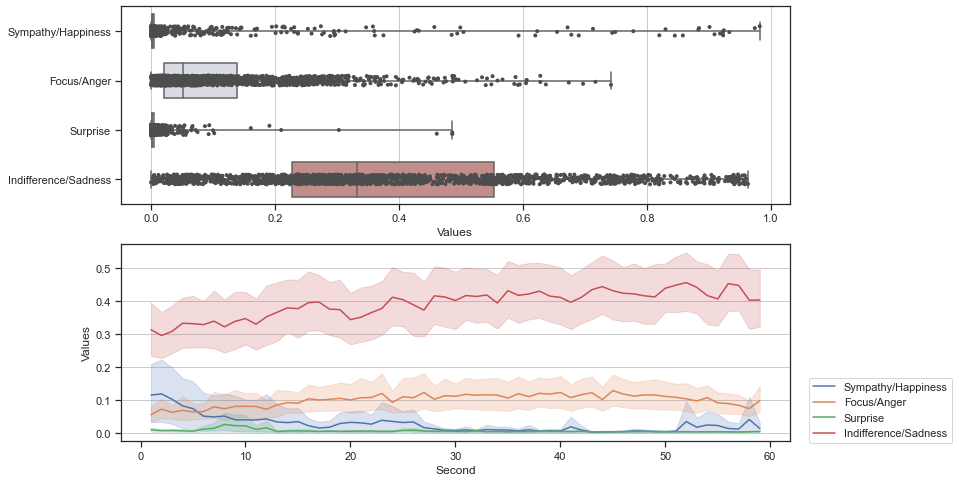

In [109]:
showAll(SessionL)

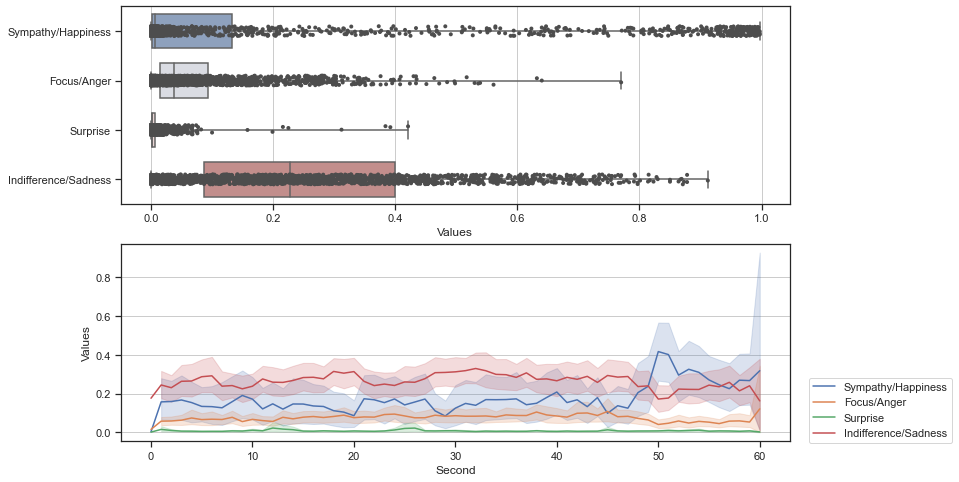

In [110]:
showAll(SessionM)

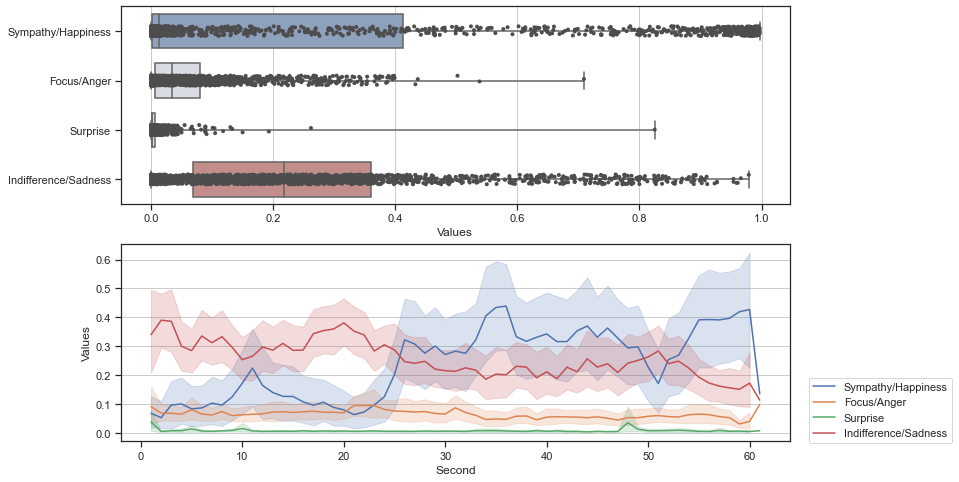

In [111]:
showAll(SessionN)

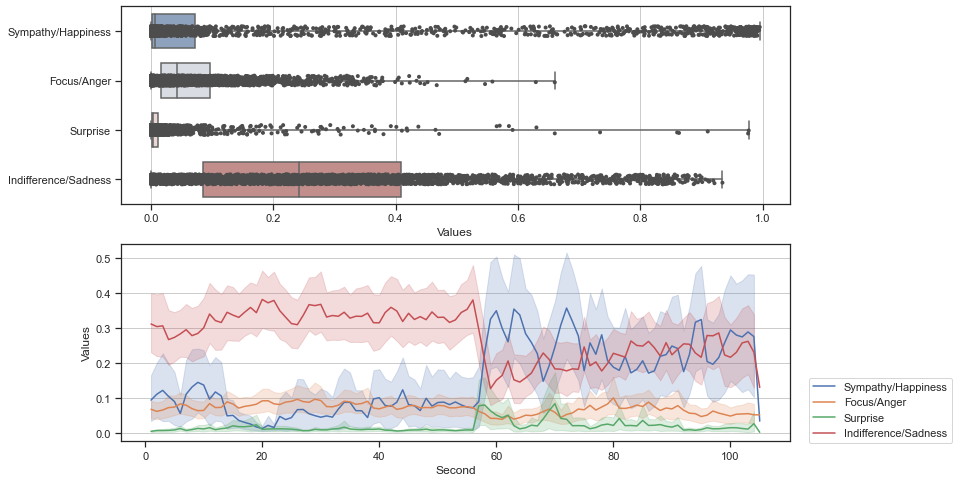

In [112]:
showAll(SessionO)

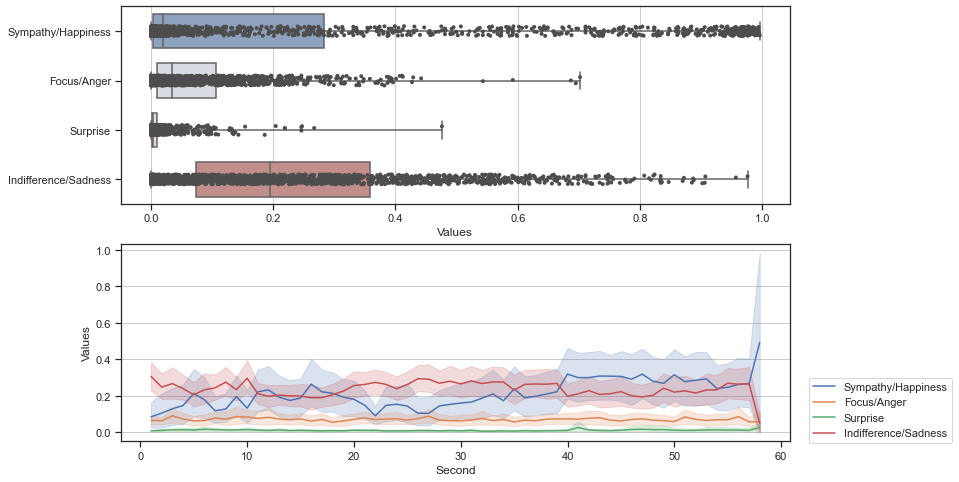

In [113]:
showAll(SessionP)

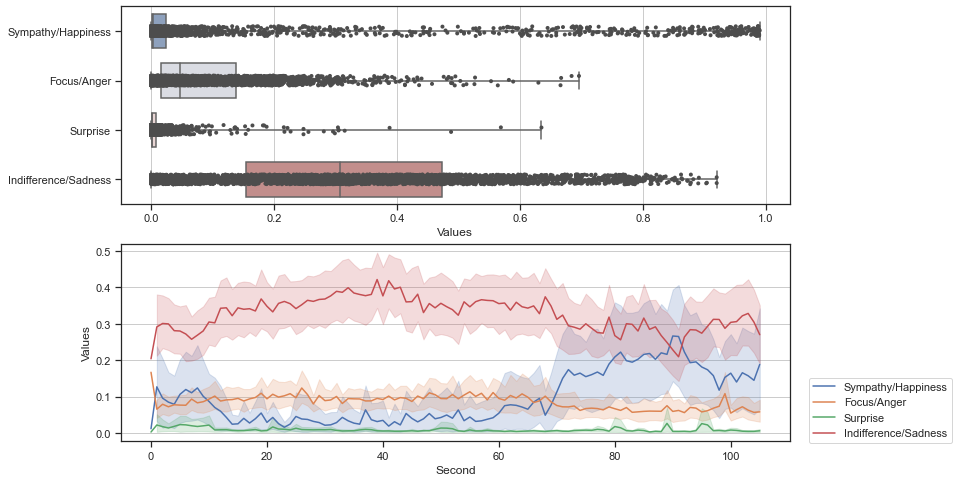

In [114]:
showAll(SessionQ)

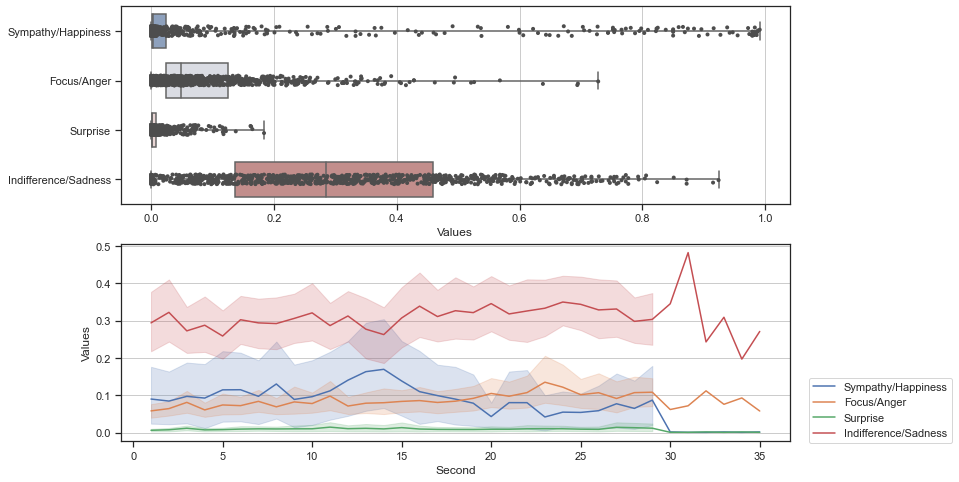

In [115]:
showAll(SessionR)

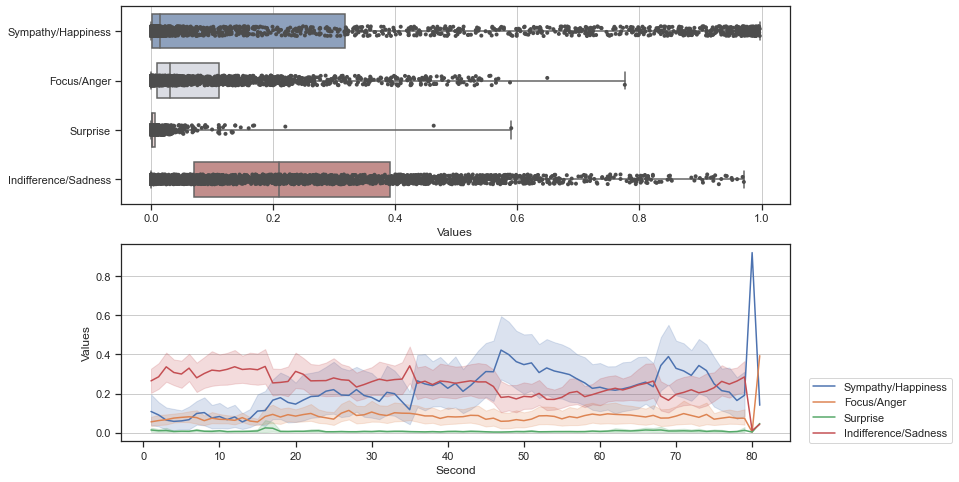

In [116]:
showAll(SessionS)

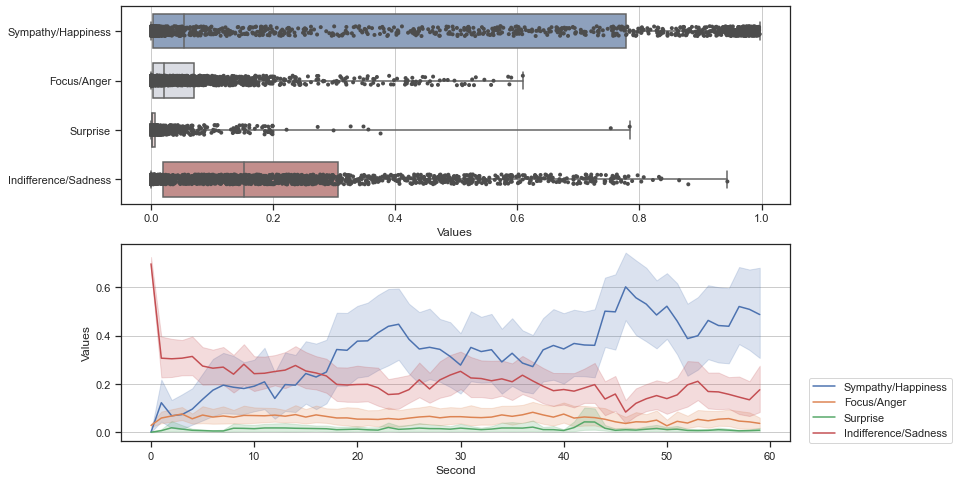

In [117]:
showAll(SessionT)

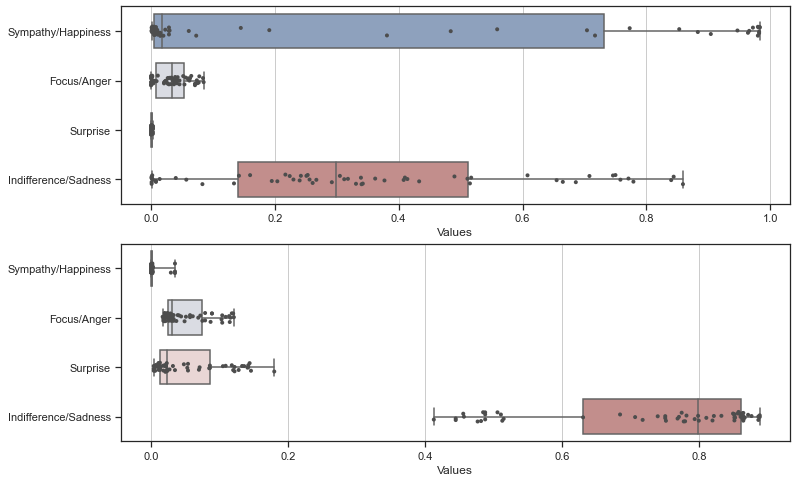

In [118]:
checkOrder(P14A, P15A)

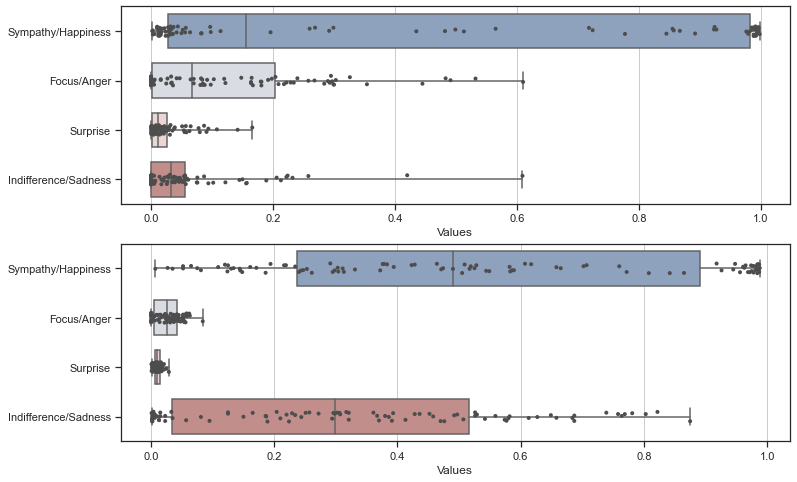

In [119]:
checkOrder(P30B, P11B)

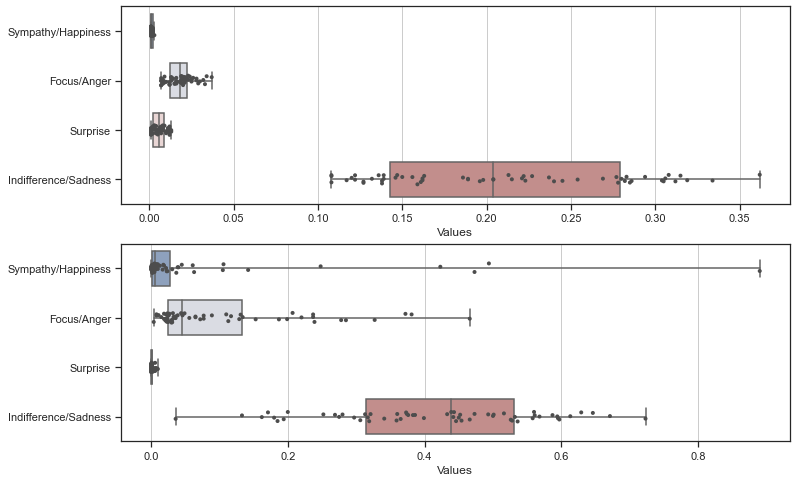

In [74]:
checkOrder(P20C, P18C)

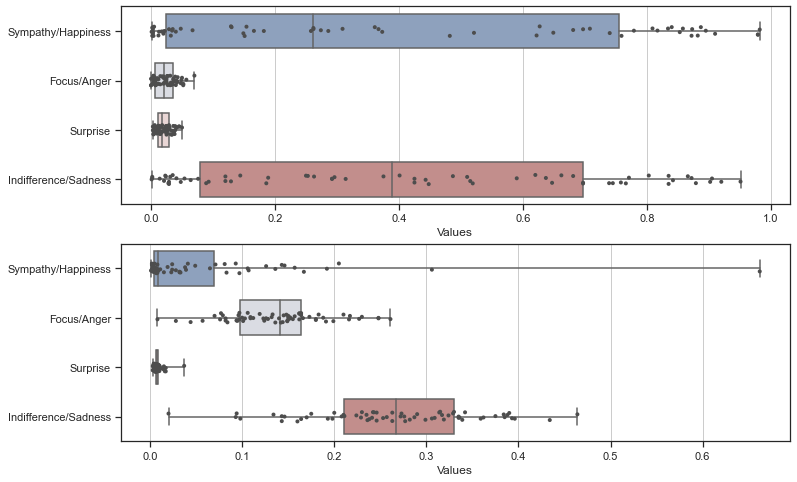

In [75]:
checkOrder(P23D, P25D)

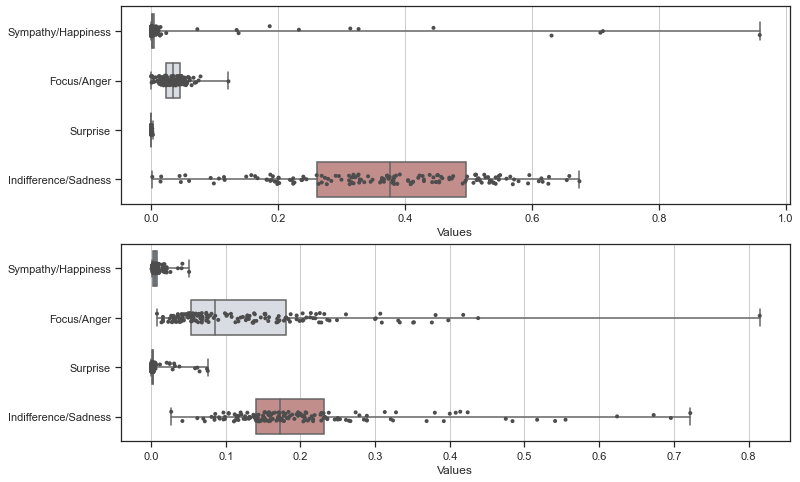

In [76]:
checkOrder(P12E, P19E)

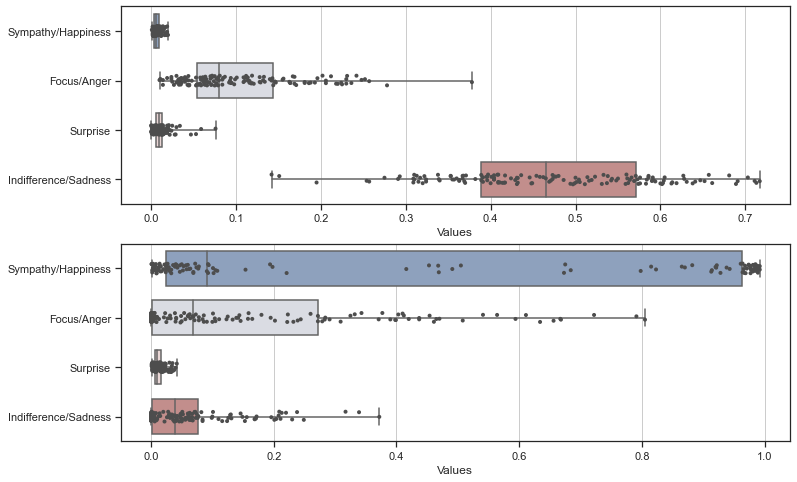

In [77]:
checkOrder(P01H, P30H)

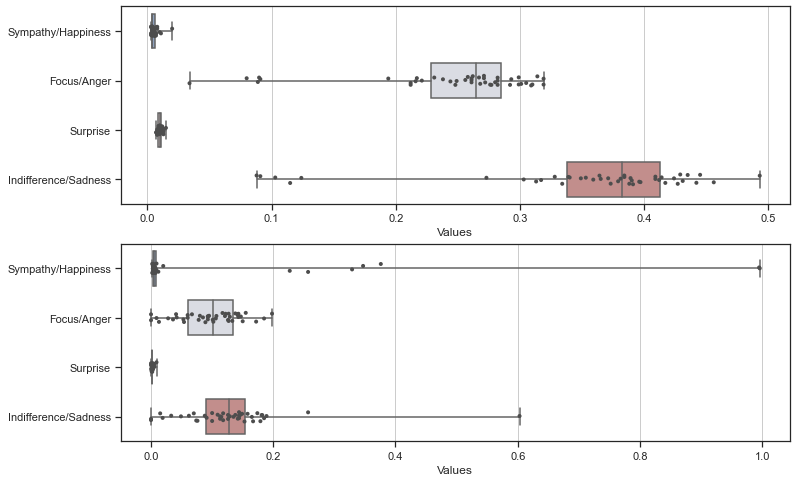

In [78]:
checkOrder(P10I, P07I)

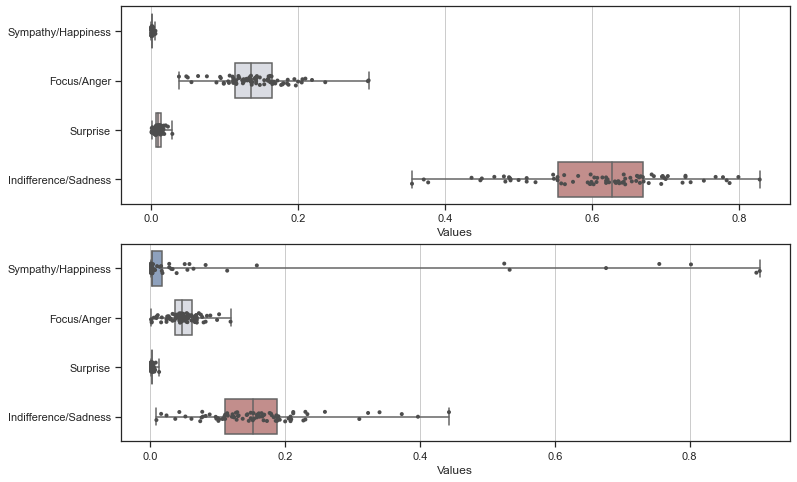

In [79]:
checkOrder(P04J, P22J)

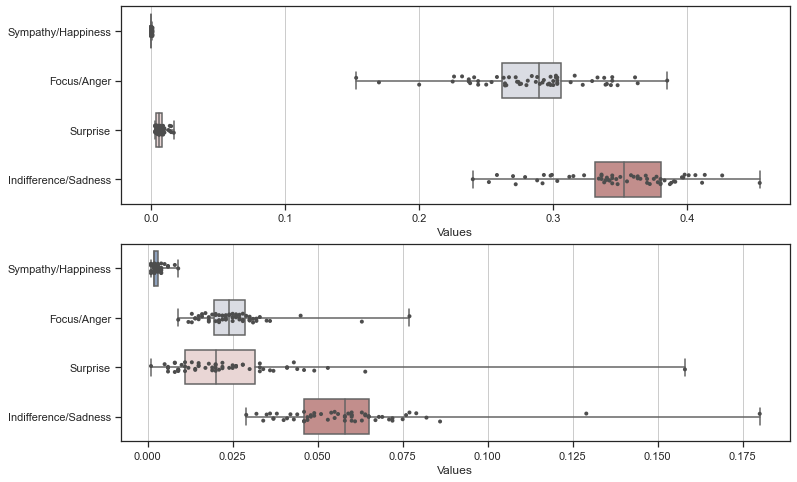

In [80]:
checkOrder(P03M, P29M)

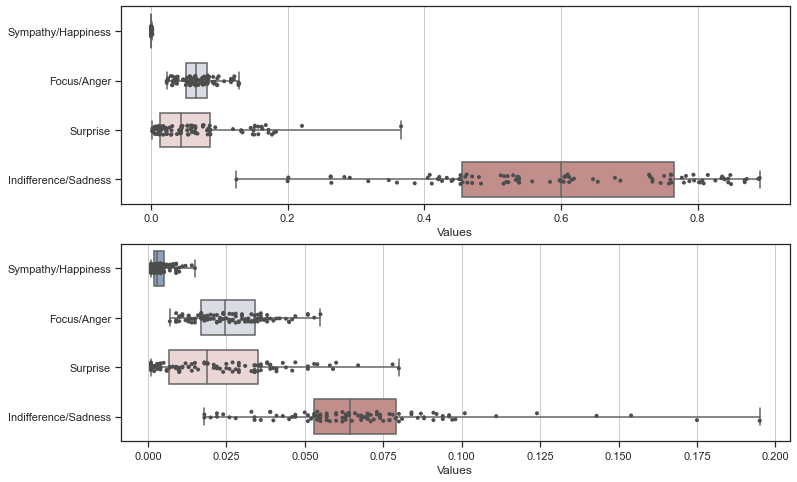

In [81]:
checkOrder(P16O, P29O)

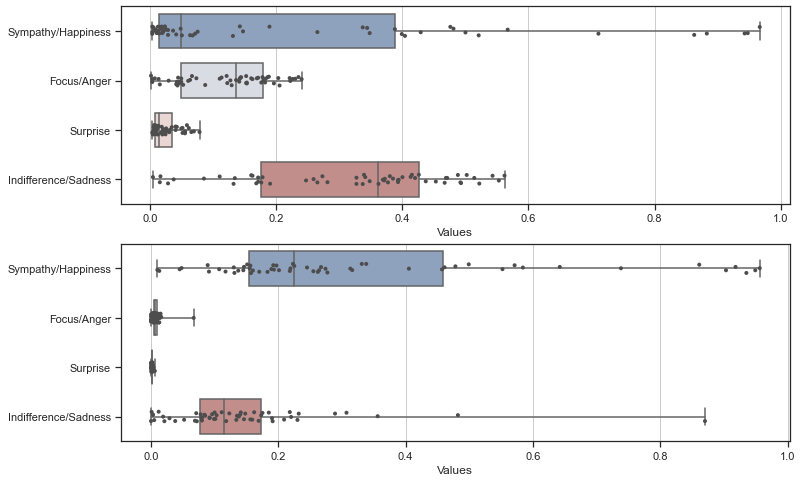

In [82]:
checkOrder(P13P, P02P)

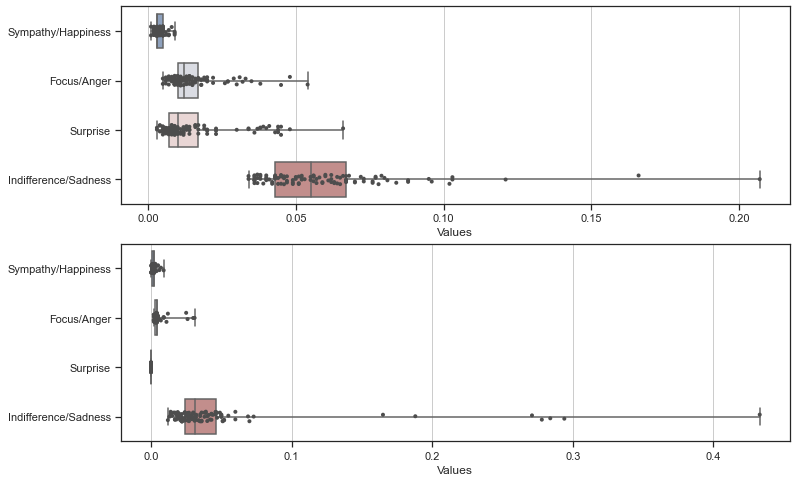

In [47]:
checkOrder(P29Q, P08Q)

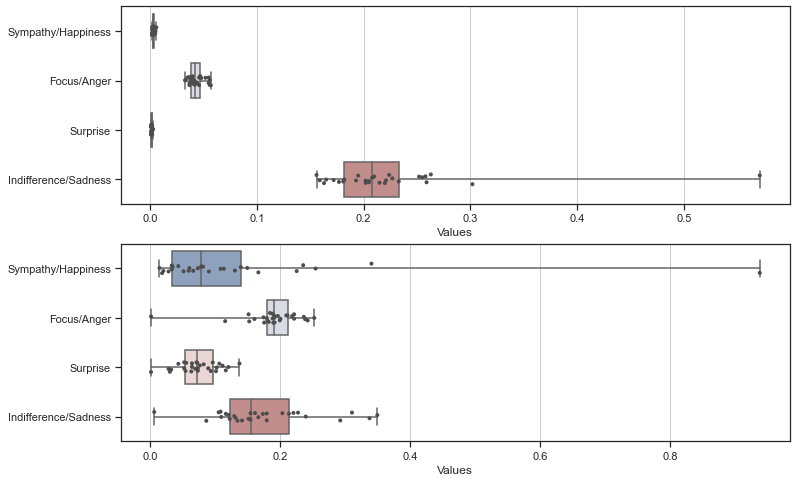

In [48]:
checkOrder(P02R, P13R)

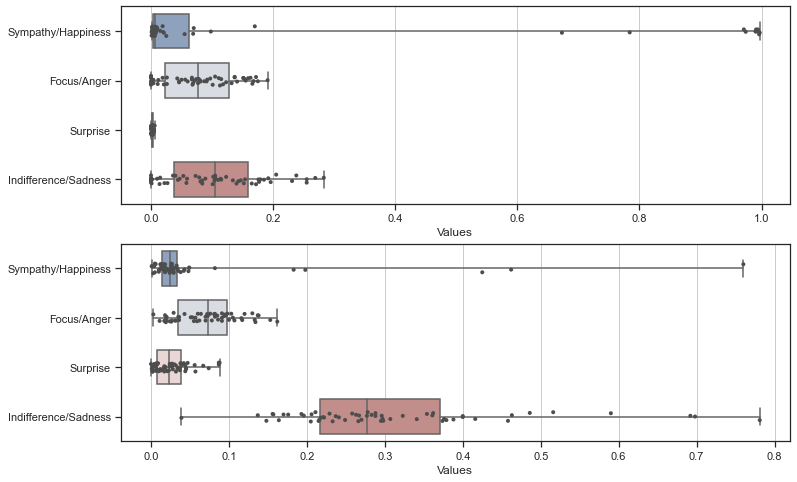

In [49]:
checkOrder(P07T, P01T)